In [1]:
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import nglview as ngl
import math as math

%matplotlib inline

kB=8.31446/1000
Temp=298.15

In [2]:
traj = md.load('TiO21a.dcd', top='TiO21aHigher1.pdb')

atoms, bonds = traj.topology.to_dataframe()

print(atoms)

   serial name element  resSeq resName  chainID segmentID
0       1   Ti      Ti       0                0          
1       2    O       O       0                0          
2       3    O       O       0                0          


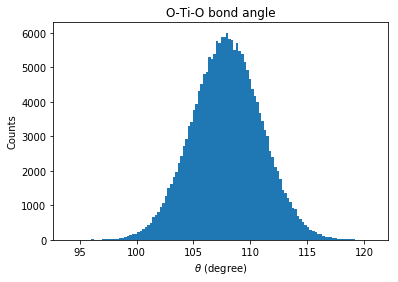

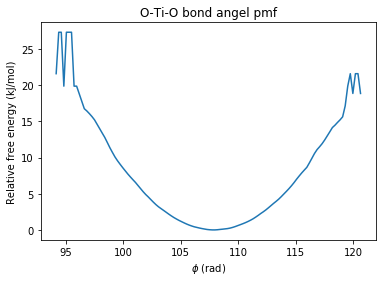

In [3]:
theta_indicies = [1,0,2]

theta=md.compute_angles(traj,[theta_indicies])*180/math.pi
theta[theta==0]=0.1
thetacounts,binedges,otherstuff = plt.hist(theta, bins=120)

plt.title('O-Ti-O bond angle')
plt.xlabel(r'$\theta$ (degree)')
plt.ylabel('Counts')
plt.show()

thetacounts[thetacounts==0]=0.1

pmf=-kB*Temp*np.log(thetacounts)
pmf=pmf-np.min(pmf)
bincenters=(binedges[1:]+binedges[:-1])/2
pmf_smoothed = sm.nonparametric.lowess(pmf, bincenters, frac=0.05)

plt.plot(pmf_smoothed[:,0], pmf_smoothed[:,1])
plt.title('O-Ti-O bond angel pmf')
plt.xlabel(r'$\phi$ (rad)')
plt.ylabel('Relative free energy (kJ/mol)')
plt.show()



In [4]:
visualize = ngl.show_mdtraj(traj)
visualize

NGLWidget(count=200000)

In [5]:
from nglview.contrib.movie import MovieMaker
import moviepy.editor as mpy

Imageio: 'ffmpeg-win32-v3.2.4.exe' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/ffmpeg/ffmpeg-win32-v3.2.4.exe (34.1 MB)
Downloading: 8192/35749888 bytes (0.0417792/35749888 bytes (1.2860160/35749888 bytes (2.41261568/35749888 bytes (3.5%1687552/35749888 bytes (4.7%2072576/35749888 bytes (5.8%2465792/35749888 bytes (6.9%2875392/35749888 bytes (8.0%3235840/35749888 bytes (9.1%3670016/35749888 bytes (10.34104192/35749888 bytes (11.54513792/35749888 bytes (12.64931584/35749888 bytes (13.85373952/35749888 bytes (15.05595136/35749888 bytes (15.76037504/35749888 bytes (16.96438912/35749888 bytes (18.06848512/35749888 bytes (19.27266304/35749888 bytes (20.37471104/35749888 bytes (20.97905280/35749888 bytes (22.18331264/35749888 bytes (23.38781824/35749888 bytes (24.69191424/35749888 bytes (25.79592832/35749888 bytes (26.810010624/35749888 bytes (28.0%10444800/35749888 bytes (29.2%10862592/35749888 bytes (30.4%1

In [7]:
mov=MovieMaker(visualize,download_folder='/Users/Garrett/Desktop',
              output='TiO2.gif')
mov.make()

In [ ]:
bondi=[0,1]
bondin=[0,2]
bondlength=md.compute_distances(traj,[bondi])

bondcounts,binedges,otherstuff=plt.hist(bondlength,bins=120)
plt.title('O-Ti bond length')
plt.xlabel(r'Bond length (nm)')
plt.ylabel('Count')
plt.show()

bondcounts[bondcounts==0]=0.1

pmf=-kB*Temp*np.log(bondcounts)
pmf=pmf-np.min(pmf)
bincenters=(binedges[1:]+binedges[:-1])/2
pmf_smoothed = sm.nonparametric.lowess(pmf, bincenters, frac=0.05)

plt.plot(pmf_smoothed[:,0], pmf_smoothed[:,1])
plt.title('O-Ti-O bond angel pmf')
plt.xlabel(r'$\phi$ (rad)')
plt.ylabel('Relative free energy (kJ/mol)')
plt.show()